In [13]:
import matplotlib.pyplot as plt ### plotting things
import numpy as np ## one of python's main maths packages
import pandas as pd ## for reading in our data
from scipy.optimize import curve_fit ## for fitting a line to our data
import matplotlib.ticker as ticker ## this one lets us change some parameters in our plots.
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
from IPython.display import display, Markdown
plt.rcParams.update({'font.size':15})   # A decent font size so the text is readible. 
from IPython.display import display, Markdown

gradient = 1.0 +/- inf
intercept = 1.0 +/- inf
The decay constant is -1.0 ± inf per second


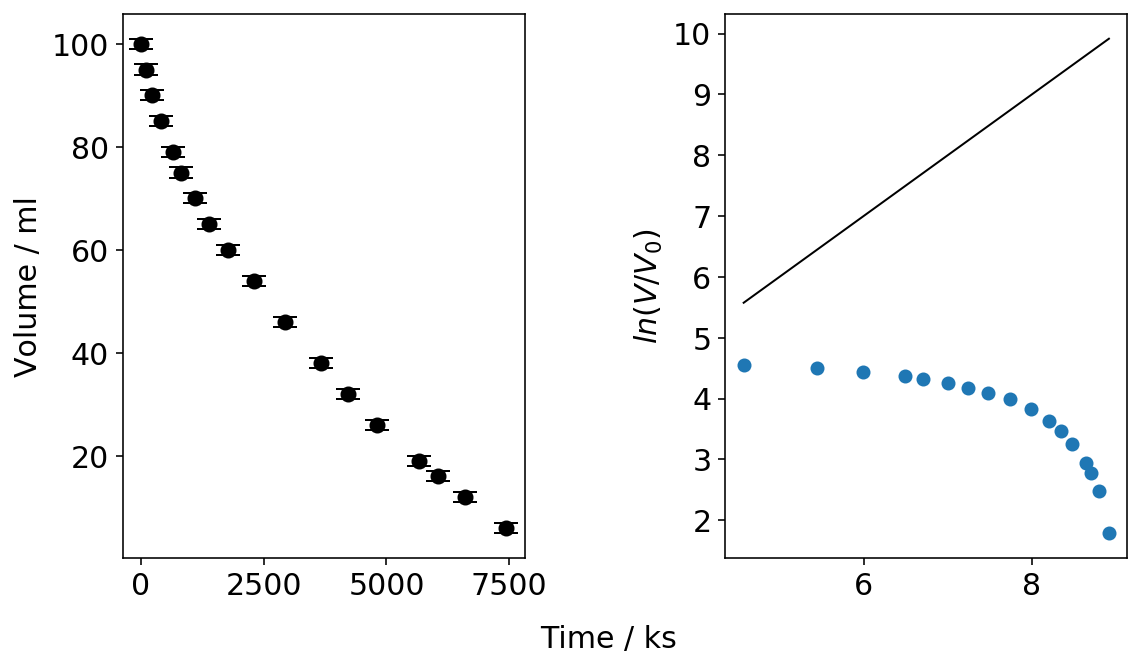

In [16]:
data = pd.read_excel('/Users/isabella/Desktop/LabGas/LeakratesHe.xlsx', names=('HeV', 'Het'))

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(9, 5))

fig.text(0.5, 0, 'Time / ks', ha='center')

ax1 = plt.subplot(1, 2, 1)
#need the uncertainties
#plt.rcParams['figure.figsize'] = [13, 5]
plt.subplots_adjust(wspace=0.5)
params = {'mathtext.default': 'regular' }
plt.rcParams.update({'font.size':15})

ax1.plot(data.Het, data.HeV, 'o')
ax1.errorbar(data.Het, data.HeV,
             yerr = 1,
             marker ='o',             
             markersize = 7,        
             color ='black',          
             linestyle ='none',       
             capsize = 6)
#plt.xlabel(' Time / ks ')
plt.ylabel('Volume / ml')


ax2= plt.subplot(1,2,2)
plt.rcParams.update({'font.size':15}) 
ax2.plot(np.log(data.Het),np.log(data.HeV), 'o')



#ax2.errorbar(data.Het, np.log(data.HeV/100), 
#             yerr = 1/data.HeV ,
#            marker ='o',             
#             markersize = 7,        
#             color ='black',          
#             linestyle ='none',       
#             capsize = 6)

def func(x, m, c):
    return m * x + c
popt2, pcov2 = curve_fit(func, np.log(data.Het), np.log(data.HeV/100), sigma = 1/data.HeV)
yfit = func(np.log(data.Het), *popt2)

ax2.plot(np.log(data.Het), yfit, color = 'black', linewidth=1) 

#plt.xlabel('Time / ks ')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ylabel('$ ln (V/V_{0}) $')

print("gradient =", popt2[0], "+/-", pcov2[0,0]**0.5)
print("intercept =", popt2[1], "+/-", pcov2[1,1]**0.5)

gradient = popt2[0]
tau = -gradient
d_gradient = pcov2[0,0]**0.5
d_tau = d_gradient

print("The decay constant is", tau, "±", d_tau, "per second")
#plt.savefig('Leakage.png', dpi = 300)
plt.show()
#it is more linear for an inverse squared relationship
#seems to be a quadratic relationship

In [11]:
#will stop leaking when the pressures are equal 
P_0 = 101100                    # Atmospheric Pressure in Pa
g = 9.81                        # gravitational constant
m = 106.68e-3                     # mass of plunger + magnet in kg       
d = 34.16e-3                    #diameter in m
a = np.pi * (d/2)**2            #cross-sectional area in m^2
P = P_0 + ((m*g)/a)

dp = P - P_0
V = 100
dt = 7440
Q = (dp * 60 *V )/ (dt * P_0)
print(Q)


0.009108640637881962
